## Spectrum Client prototypes

In [1]:
import numpy as np
import pandas as pd
import pycurl_requests as requests

from io import BytesIO
from astropy import units as u
from astropy.visualization import quantity_support

from matplotlib import pyplot as plt
%matplotlib notebook

from specutils import Spectrum1D

In [2]:
# Global vars for test data
svc_base = "http://gp06.datalab.noao.edu:6999"

release  = 'dr16'
run2d    = 26
plate    = 1263
mjd      = 52708
fiber    = 13
bands    = 'flux,loglam,model,ivar'

### Single-Spectrum client

In [3]:
def getSpec (release, run2d, plate, mjd, fiber, bands):
    '''Utility to get a spectrum from the NPY save files. 
    '''
    url = svc_base + "/coadd?release=%s&run2d=%d&plate=%d&mjd=%d&fiber=%d&bands=%s" % \
        (release, run2d, plate, mjd, fiber, bands)
    try:
        r = requests.get (url, timeout=2)
    except Exception as e:
        raise Exception("Error getting data: " + str(e))
    else:
        return np.load(BytesIO(r.content), allow_pickle=False)

In [4]:
%%time

npy_data = getSpec(release,run2d,plate,mjd,fiber,bands)
if npy_data is None:
    print ('Error: None data')
else:
    print ('Data:  len = ' + str(len(npy_data)) + '  shape: ' + str(npy_data.shape))
    print ('Names: ' + str(npy_data.dtype.names))
    #print (npy_data)

Data:  len = 3832  shape: (3832,)
Names: ('flux', 'loglam', 'ivar', 'model')
CPU times: user 7 ms, sys: 3 ms, total: 10 ms
Wall time: 29.7 ms


### Specutils

In [5]:
def to_Spectrum1D (npy_data):
    ''' Convert a Numpy spectrum array to a Spectrum1D object.
    '''
    lamb = 10**npy_data['loglam'] * u.AA 
    flux = npy_data['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

    return Spectrum1D(spectral_axis=lamb, flux=flux)

In [6]:
spec1d = to_Spectrum1D(npy_data)

### Pandas Data Frame

In [7]:
def to_pandas (npy_data):
    return pd.DataFrame(data=npy_data,columns=npy_data.dtype.names)

In [8]:
df = to_pandas(npy_data)

### Plot Utilities

In [9]:
def plotSpec (spec):
    '''
    '''
    f, ax = plt.subplots() 
    if isinstance (spec, np.ndarray):
        ax.step(10**df['loglam'], df['flux']) 
    elif isinstance (spec, pd.DataFrame):
        ax.step(10**df['loglam'], df['flux']) 
    elif isinstance (spec, Spectrum1D):
        ax.step(spec.spectral_axis, spec.flux)
    else:
        raise Exception('Unknown format: ' + str(type(spec)))

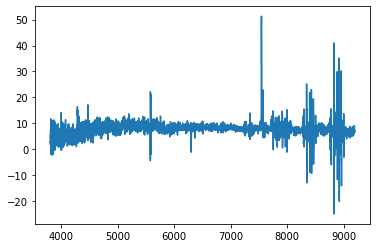

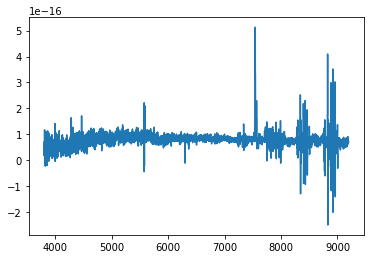

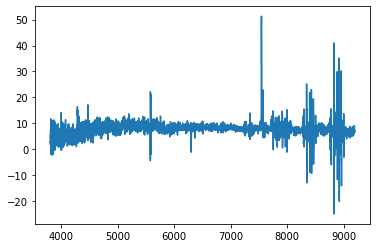

In [10]:
plotSpec (npy_data)     # Numpy array
plotSpec (spec1d)       # Spectrum1D
plotSpec (df)

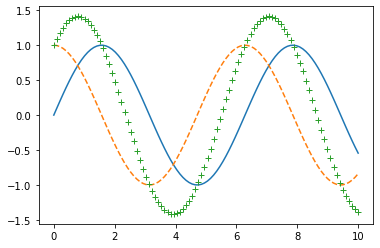

In [13]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.plot(x, np.sin(x)+np.cos(x), '+');